In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import time
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import datetime as dt
from dateutil.relativedelta import relativedelta

## Data loading

Load the data from the npy file. Also, set constant values.

In [2]:
file = "../data/data.npy"

data = np.load(file)
print(f'Date has a shape of {data.shape}.')

START_DATE = dt.datetime(1979, 1, 1)
LON_COORD = (-15, 40)
LAT_COORD = (75, 35)

Date has a shape of (507, 161, 221).


## Define functions

In [3]:
# http://tech.weatherforce.org/blog/ecmwf-data-animation/index.html

def make_figure():
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    # ax.add_feature(cfeat.LAND)
    # ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    # ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
    ax.set_extent ((LON_COORD[0], LON_COORD[1], LAT_COORD[1], LAT_COORD[0]), cartopy.crs.PlateCarree())
    return fig, ax

def create_image(t, use_cartopy=True):
    if use_cartopy:
        fig, ax = make_figure()

        lat = np.linspace(LAT_COORD[0], LAT_COORD[1], data.shape[1])
        lon = np.linspace(LON_COORD[0], LON_COORD[1], data.shape[2])

        ax.contourf(lon, lat, data[t])
    else:
        fig, ax = plt.subplots(1, 1, figsize=[16, 9])
        ax.imshow(data[t])
    return ax

## Visualizing with matplotlib

First visualizations of the data using matplotlib.

<IPython.core.display.Javascript object>


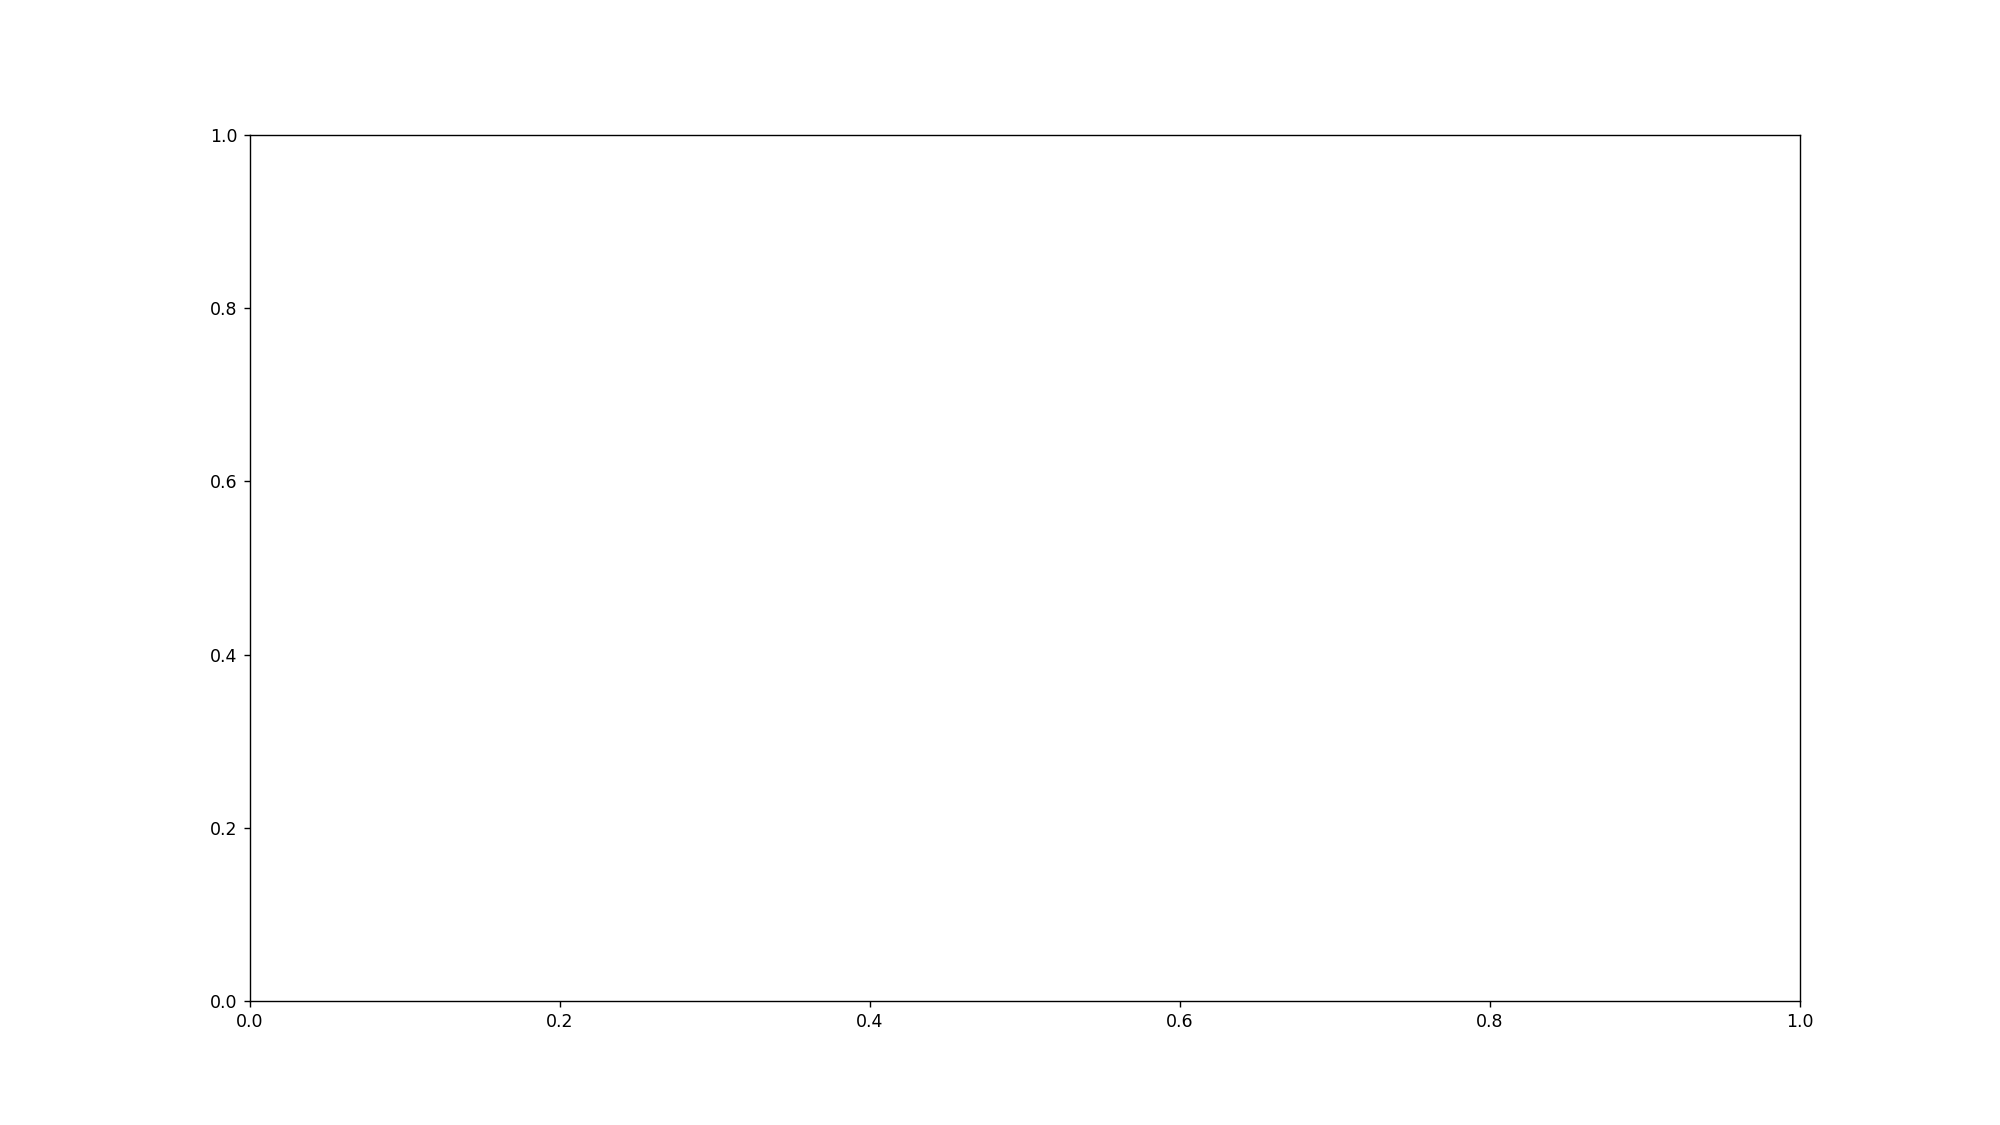

In [4]:
%matplotlib notebook

def update(t, ax, data):
    curr_date = START_DATE + relativedelta(months=t)
    ax.set_title(f"Current date: {curr_date.strftime('%Y-%m-%d')}")
    time.sleep(0.2)
    ax.imshow(data[t])
    return None

fig, ax = plt.subplots(1, 1, figsize=[16, 9])
ITERATIONS = data.shape[0]

anim = FuncAnimation(fig, update, frames=ITERATIONS, interval=50, blit=True, 
                     fargs=([ax, data]))

The following cell shows the outlines of europe quite well.

<IPython.core.display.Javascript object>


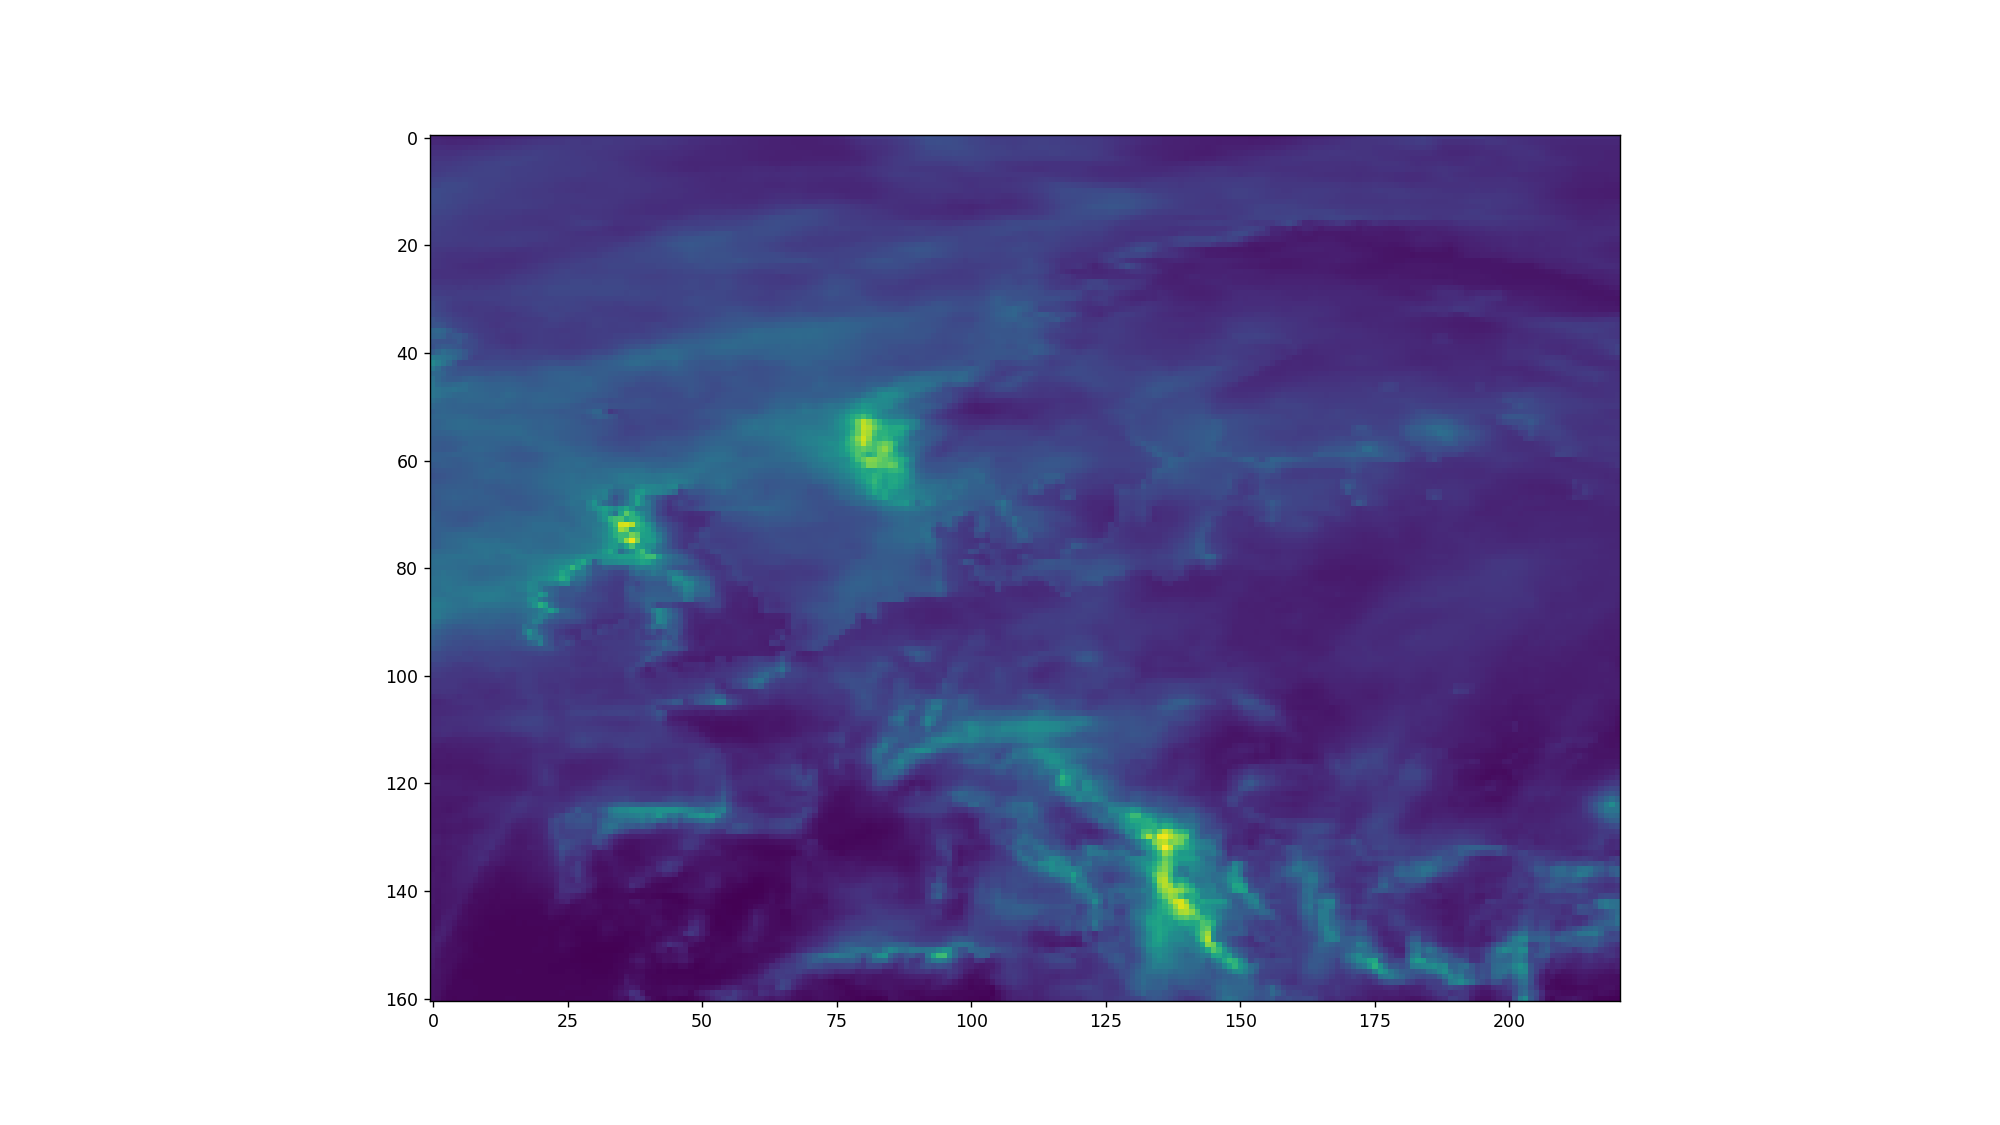

In [5]:
fig, ax = plt.subplots(1, 1, figsize=[16, 9])
ax.imshow(data[10])

## Cartopy

Use cartopy to visualize the data.

<IPython.core.display.Javascript object>


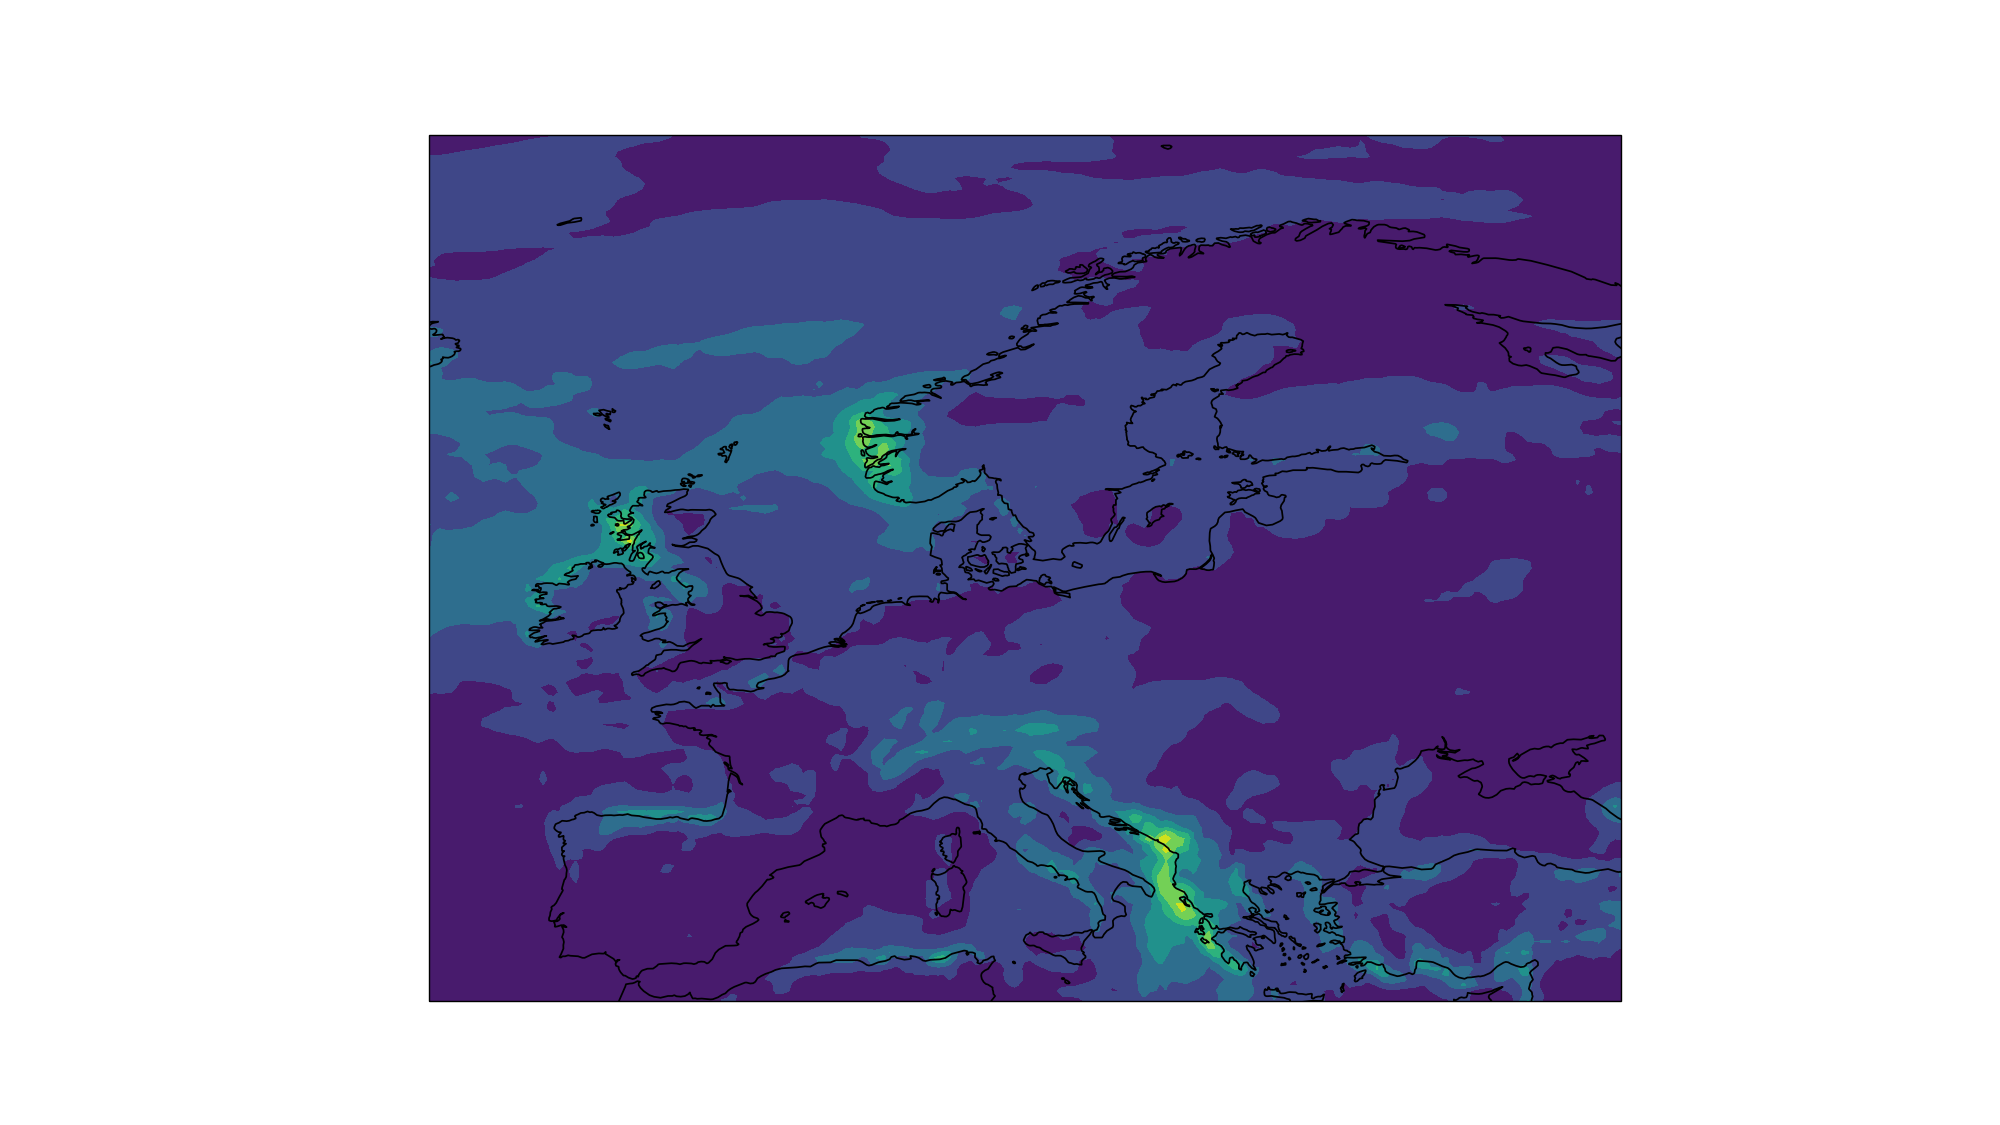

In [6]:
fig, ax = make_figure()

lat = np.linspace(LAT_COORD[0], LAT_COORD[1], data.shape[1])
lon = np.linspace(LON_COORD[0], LON_COORD[1], data.shape[2])

ax.contourf(lon, lat, data[10])

<IPython.core.display.Javascript object>


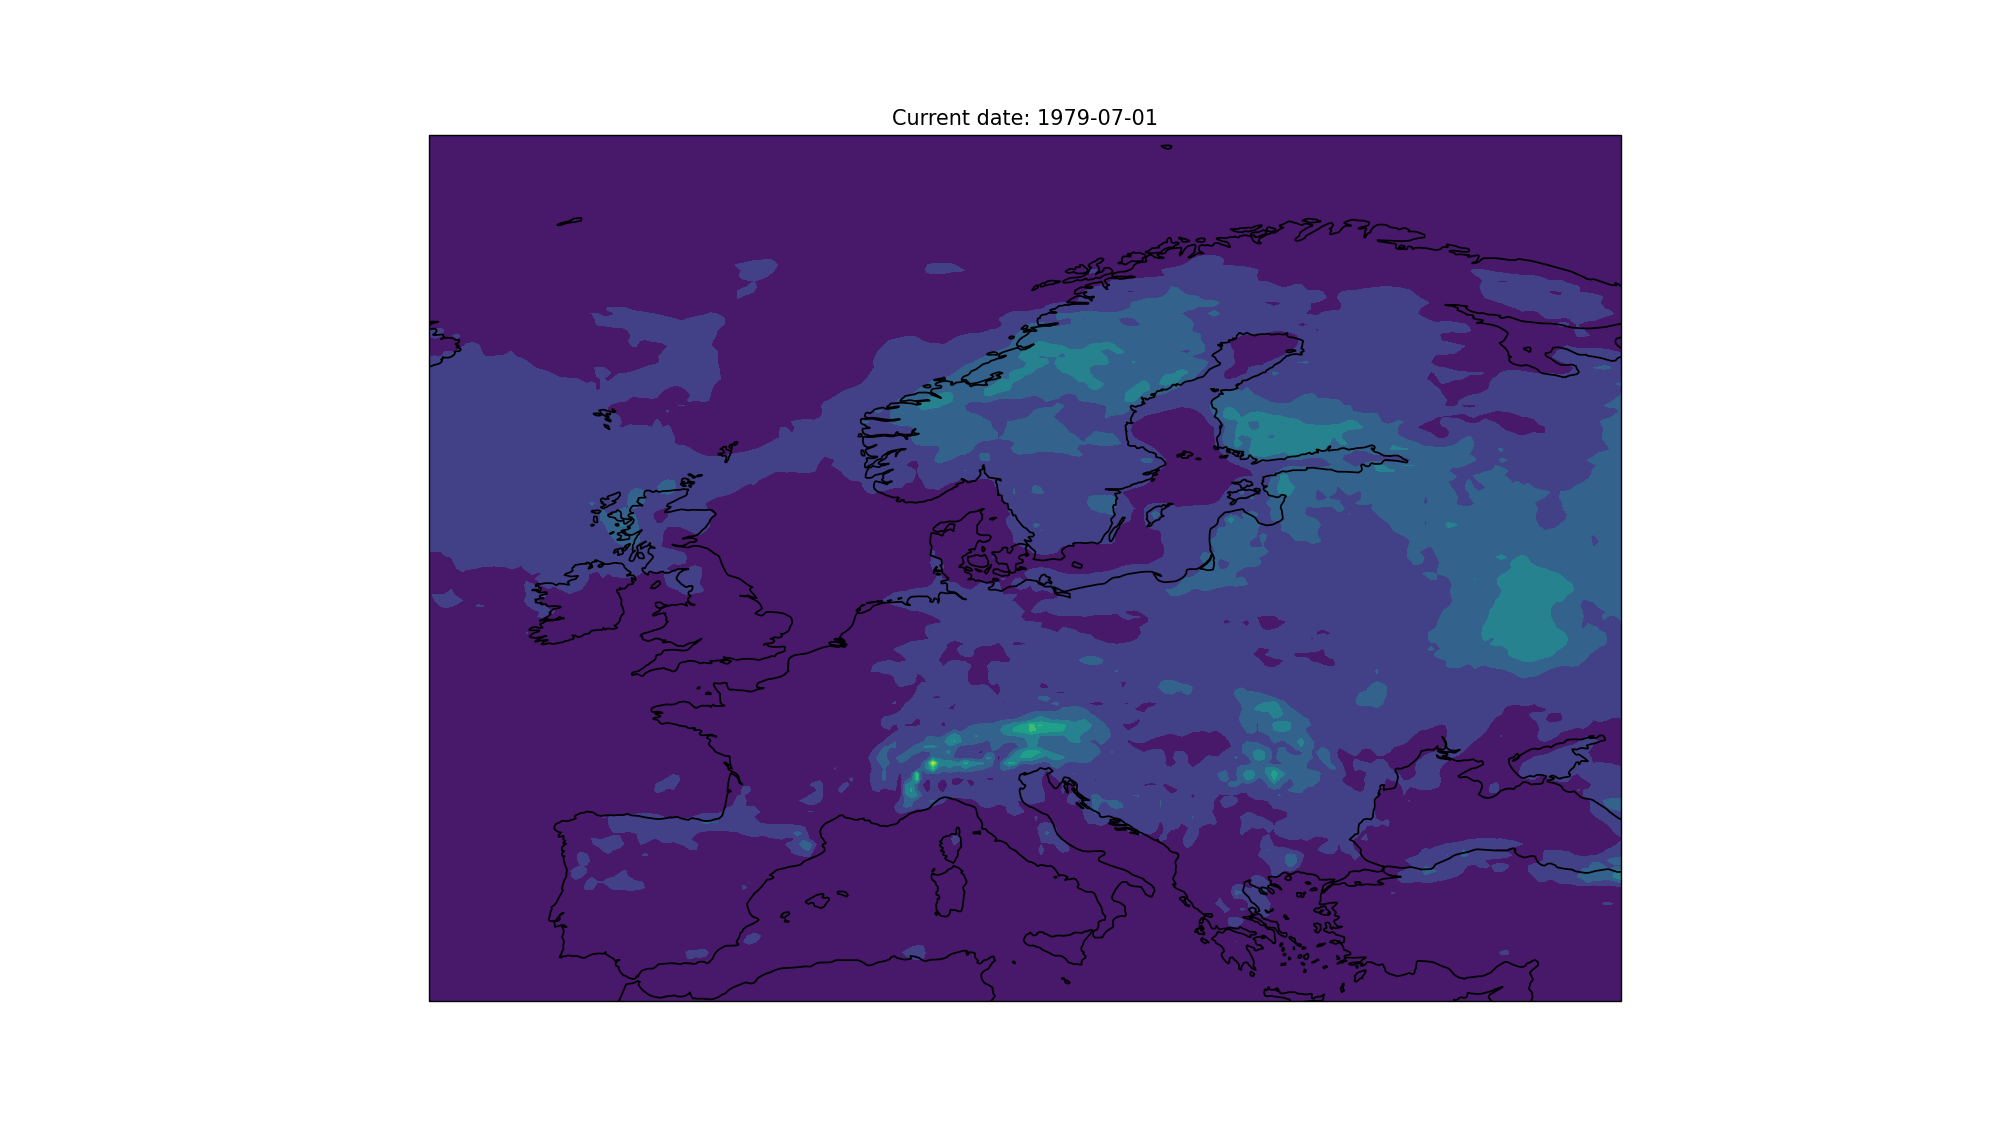

In [7]:
def update(t, ax, data):
    curr_date = START_DATE + relativedelta(months=t)
    ax.set_title(f"Current date: {curr_date.strftime('%Y-%m-%d')}")
    time.sleep(0.2)
    ax.contourf(lon, lat, data[t])
    return None

fig, ax = make_figure()
# ITERATIONS = data.shape[0]
ITERATIONS = 100 # only use 100 time steps as we will likely not watch the whole animation

anim = FuncAnimation(fig, update, frames=ITERATIONS, interval=400, blit=True, 
                     fargs=([ax, data]))
# anim.save('anim.gif')

In [8]:
gridded_means = np.zeros_like(data[0])
gridded_stds  = np.zeros_like(data[0])

MISSING_VALUE = -32767.

def calc_mean_std(x):
    data_mean = np.mean(x)
    data_std  = np.std(x)
    
    return data_mean, data_std

for i in range(gridded_means.shape[0]):
    for j in range(gridded_means.shape[1]):
        x = data[:, i, j]
        data_mean, data_std = calc_mean_std(x)
        
        gridded_means[i][j] = data_mean
        gridded_stds[i][j]  = data_std

<IPython.core.display.Javascript object>


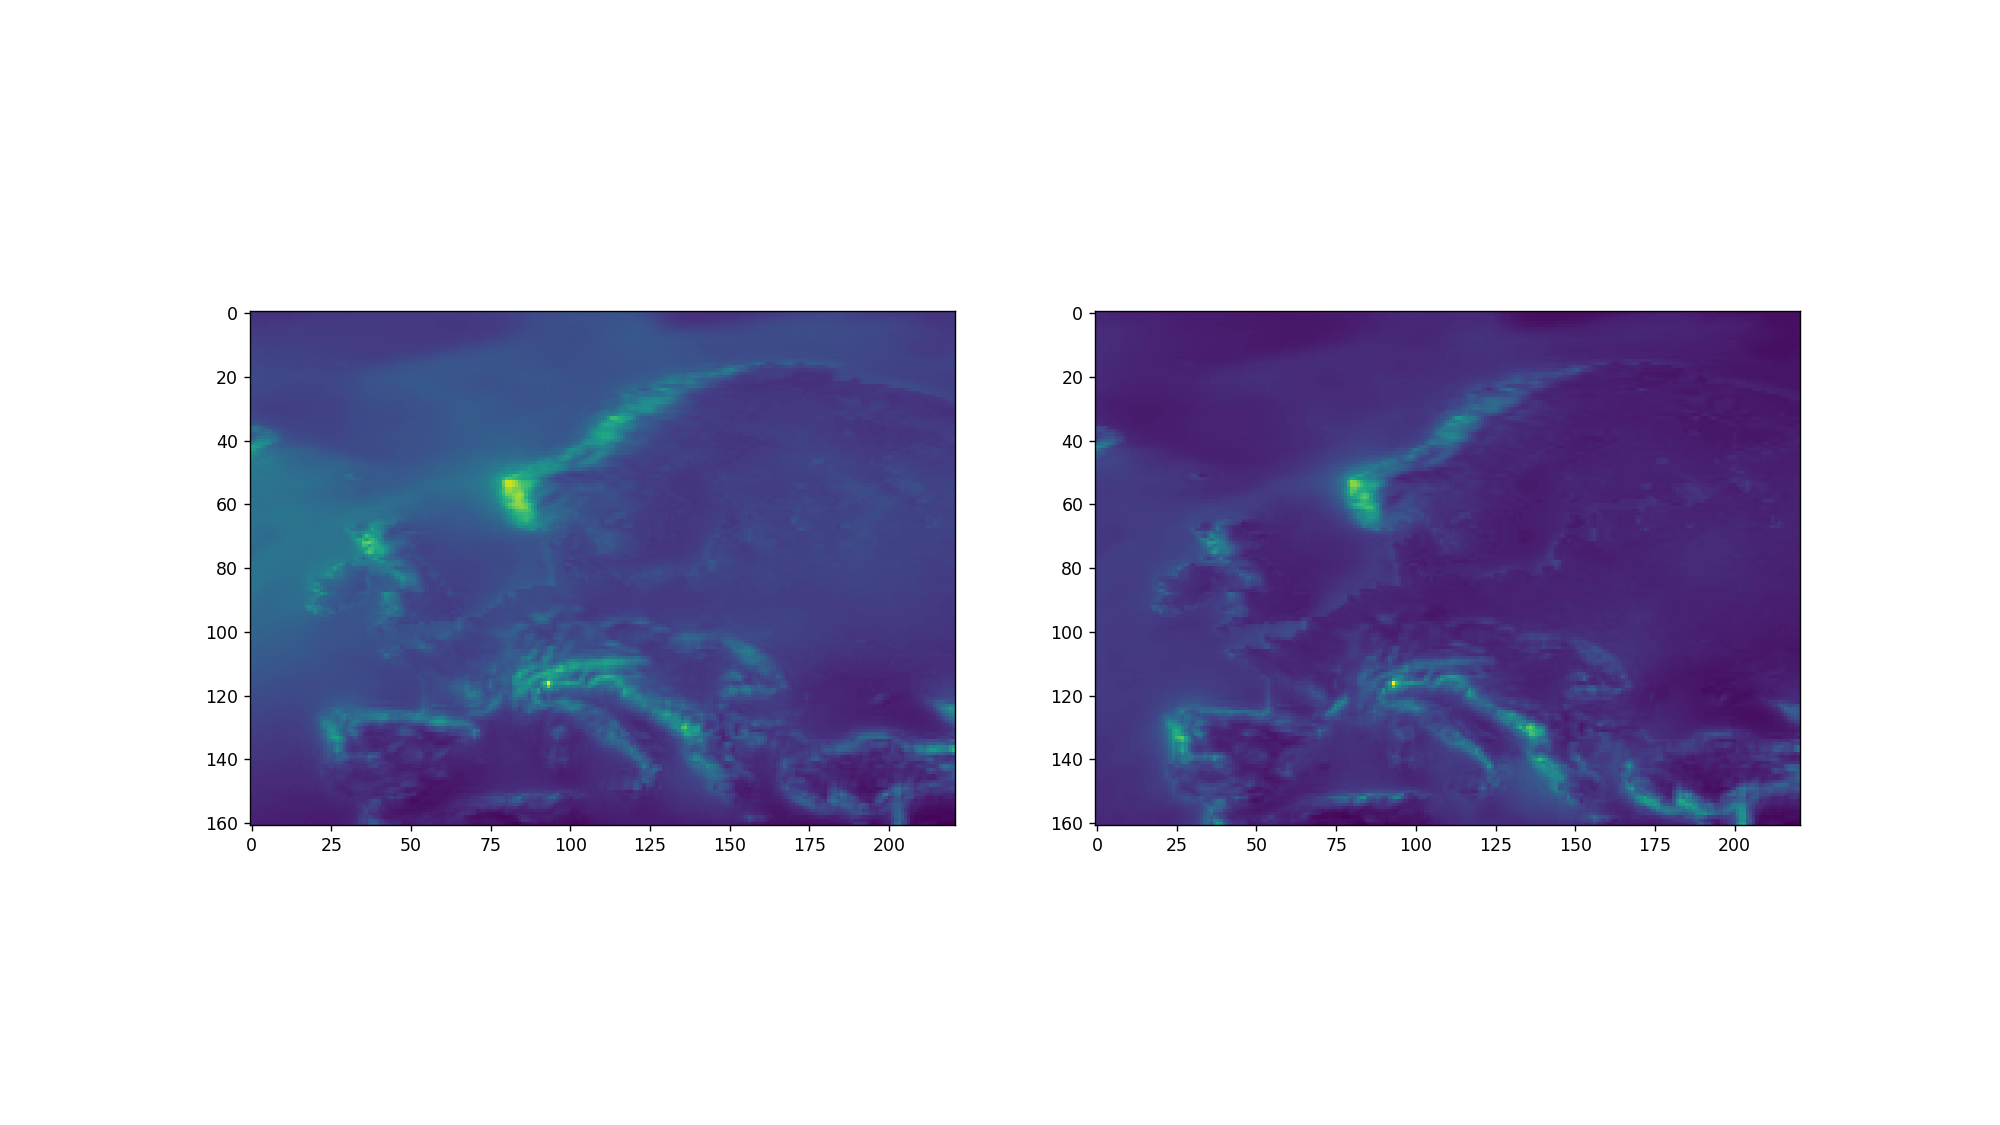

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 9])
ax1.imshow(gridded_means)
ax2.imshow(gridded_stds)

<IPython.core.display.Javascript object>


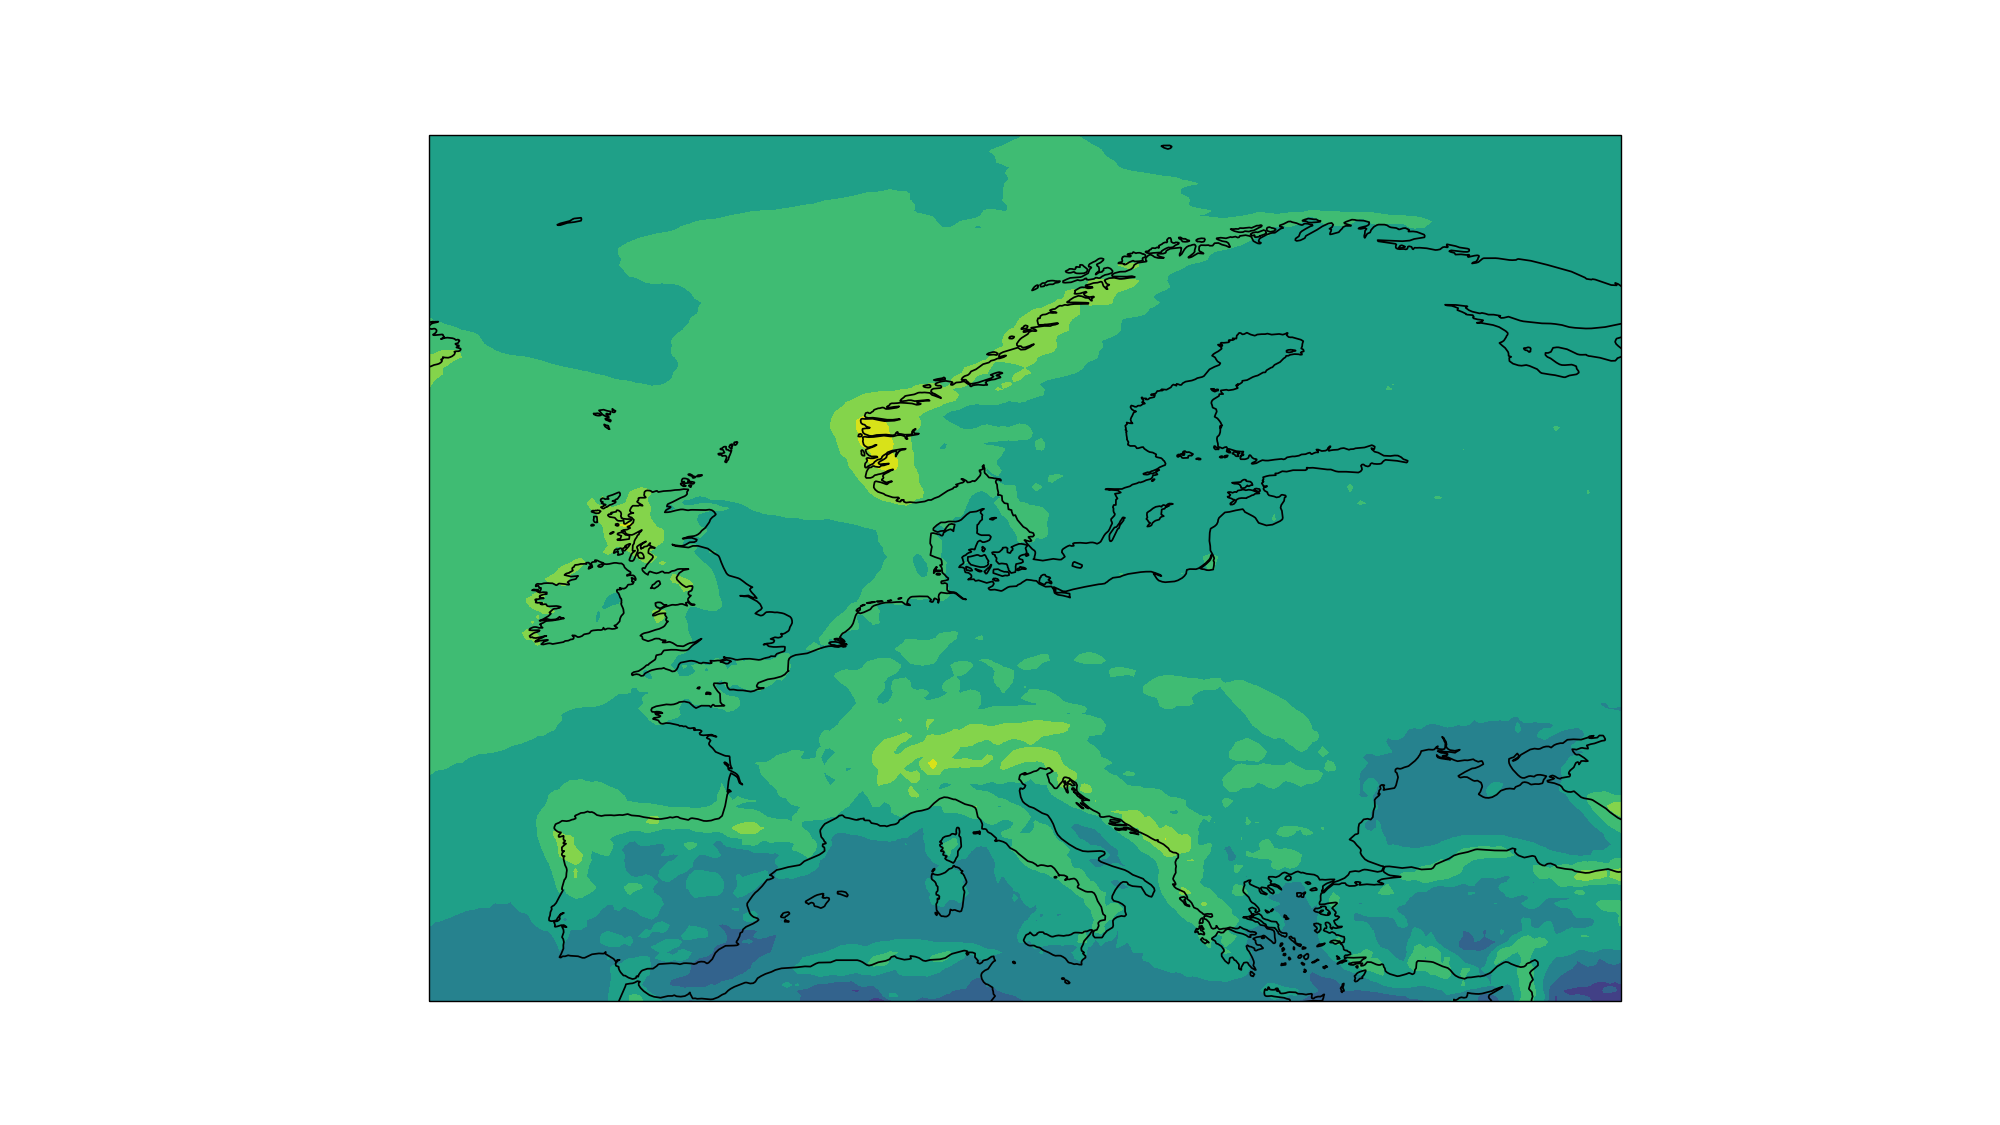

In [10]:
fig, ax = make_figure()

lat = np.linspace(LAT_COORD[0], LAT_COORD[1], data.shape[1])
lon = np.linspace(LON_COORD[0], LON_COORD[1], data.shape[2])

ax.contourf(lon, lat, np.log(gridded_means))

<IPython.core.display.Javascript object>


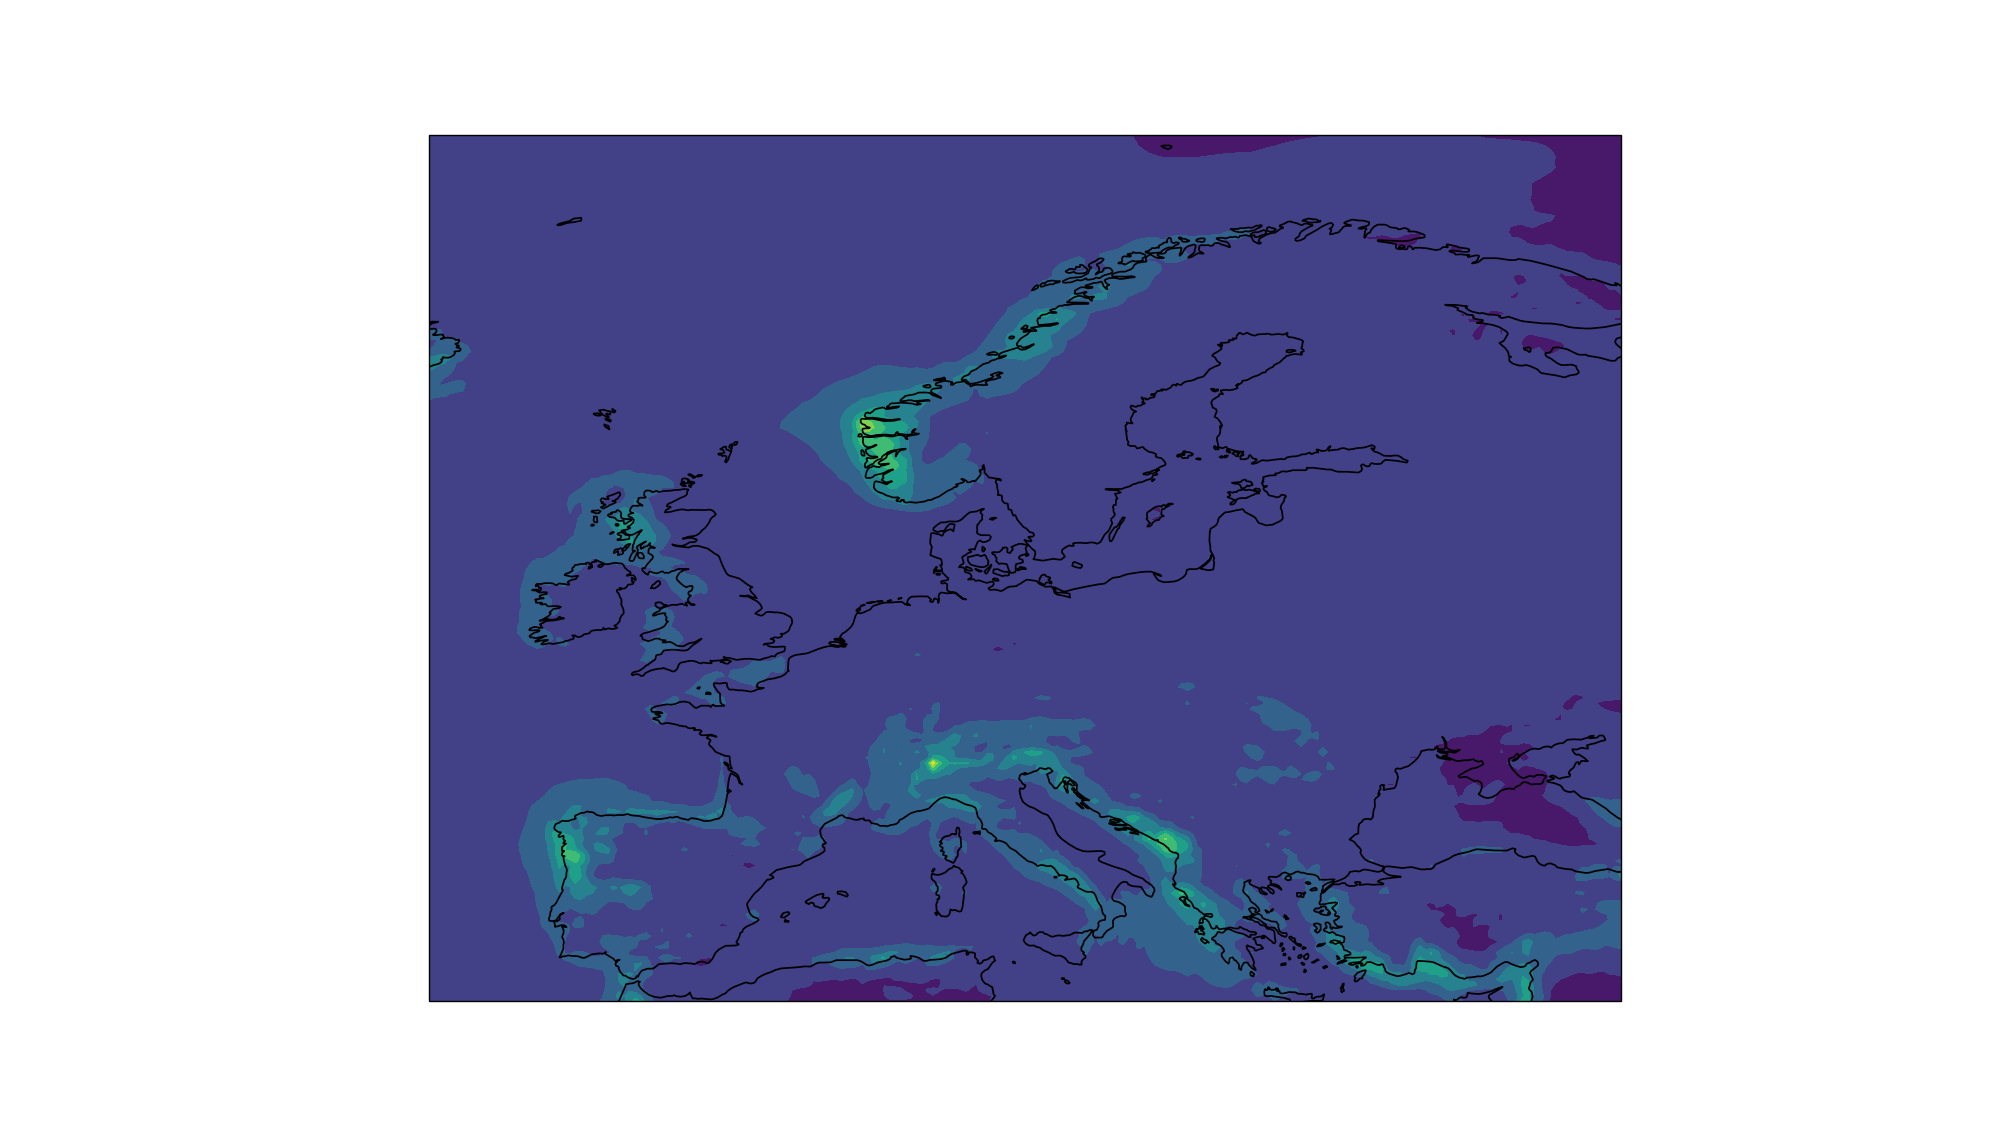

In [11]:
import matplotlib as mpl

fig, ax = make_figure()

lat = np.linspace(LAT_COORD[0], LAT_COORD[1], data.shape[1])
lon = np.linspace(LON_COORD[0], LON_COORD[1], data.shape[2])

# cmap = plt.cm.RdYlBu_r
ax.contourf(lon, lat, gridded_stds)